## Análisis de retención de personal

In [ ]:
# Importar la librería pandas
import pandas as pd

# Leer el conjunto de datos por medio de ruta de Drive y asignarlo a la variable "df"
dataset = "/content/drive/MyDrive/Datasets/employee_churn_data.csv"
df = pd.read_csv(dataset)

### Diccionario de datos

**department:** Departamento al que pertenece el empleado.

**promoted:** Indica si el empleado ha sido promovido (1) o no (0).

**review:** Puntuación de la revisión del empleado.

**projects:** Número de proyectos en los que el empleado está involucrado.

**salary:** Nivel salarial (bajo, medio, alto).

**tenure:** Años de antigüedad del empleado.

**satisfaction:** Nivel de satisfacción del empleado.

**bonus:** Indica si el empleado ha recibido un bono (1) o no (0).

**avg_hrs_month:** Promedio de horas trabajadas al mes.

**left:** Indica si el empleado ha dejado la empresa (sí o no).

In [ ]:
#Revisión de los 5 primeros registros
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
#Revisión de los 5 últimos registros
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


In [ ]:
#Revisión de la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
#Verificación de duplicados
df.duplicated().sum()

0

In [ ]:
#Revisión de los estadísticos decriptivos para datos cuantitativos
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [ ]:
#Revisión de los estadísticos decriptivos para todos los datos
df.describe(include = "all")

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540,9540.000000,9540.000000,9540.000000,9540,9540.000000,9540.000000,9540.000000,9540.000000,9540
unique,10,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,sales,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,no
freq,1883,NaN,NaN,NaN,6611,NaN,NaN,NaN,NaN,6756
mean,NaN,0.030294,0.651826,3.274843,NaN,6.556184,0.504645,0.212055,184.661571,NaN
std,NaN,0.171403,0.085307,0.579136,NaN,1.415432,0.158555,0.408785,4.144831,NaN
min,NaN,0.000000,0.310000,2.000000,NaN,2.000000,0.000000,0.000000,171.374060,NaN
25%,NaN,0.000000,0.592884,3.000000,NaN,5.000000,0.386801,0.000000,181.472085,NaN
50%,NaN,0.000000,0.647456,3.000000,NaN,7.000000,0.500786,0.000000,184.628796,NaN
75%,NaN,0.000000,0.708379,4.000000,NaN,8.000000,0.622607,0.000000,187.728708,NaN


In [ ]:
# Identificación de los datos vacíos.
missing_data_na = df.isna()
missing_data_na.head(25)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Identificación de los datos nulos.
missing_data_null = df.isnull()
missing_data_null.head(25)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Datos nulos por columna
for column in missing_data_null.columns.values.tolist():
    print (missing_data_null[column].value_counts())

    print("")

department
False    9540
Name: count, dtype: int64

promoted
False    9540
Name: count, dtype: int64

review
False    9540
Name: count, dtype: int64

projects
False    9540
Name: count, dtype: int64

salary
False    9540
Name: count, dtype: int64

tenure
False    9540
Name: count, dtype: int64

satisfaction
False    9540
Name: count, dtype: int64

bonus
False    9540
Name: count, dtype: int64

avg_hrs_month
False    9540
Name: count, dtype: int64

left
False    9540
Name: count, dtype: int64



In [ ]:
#Datos vacíos por columna
for column in missing_data_na.columns.values.tolist():

    print (missing_data_na[column].value_counts())

    print("")

department
False    9540
Name: count, dtype: int64

promoted
False    9540
Name: count, dtype: int64

review
False    9540
Name: count, dtype: int64

projects
False    9540
Name: count, dtype: int64

salary
False    9540
Name: count, dtype: int64

tenure
False    9540
Name: count, dtype: int64

satisfaction
False    9540
Name: count, dtype: int64

bonus
False    9540
Name: count, dtype: int64

avg_hrs_month
False    9540
Name: count, dtype: int64

left
False    9540
Name: count, dtype: int64



In [ ]:
# Conteo de datos faltantes
df.isna().sum()

,0
department,0
promoted,0
review,0
projects,0
salary,0
tenure,0
satisfaction,0
bonus,0
avg_hrs_month,0
left,0


In [ ]:
# Conteo de nulos
df.isnull().sum()

,0
department,0
promoted,0
review,0
projects,0
salary,0
tenure,0
satisfaction,0
bonus,0
avg_hrs_month,0
left,0


In [ ]:
# Conteo de no nulos
df.notnull().sum()

,0
department,9540
promoted,9540
review,9540
projects,9540
salary,9540
tenure,9540
satisfaction,9540
bonus,9540
avg_hrs_month,9540
left,9540


De acuerdo a los resultados anteriores, el dataset  no tiene datos nulos ni vacíos en ninguno de sus 9540 registros.

Verificar que todos los datos estén en el formato correcto

In [ ]:
df.dtypes

,0
department,object
promoted,int64
review,float64
projects,int64
salary,object
tenure,float64
satisfaction,float64
bonus,int64
avg_hrs_month,float64
left,object


<ipython-input-26-a4051d5bf466>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




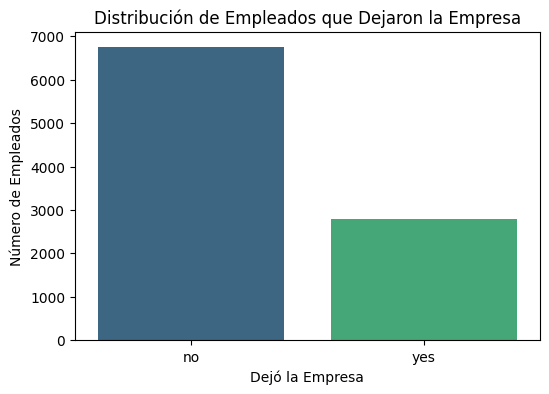

In [26]:
#Teniendo en cuenta que el objetivo se centra en la retención de empleados, me gustaría visualizar en primera instancia, la distribución de la variable 'left'

import seaborn as sns
import matplotlib.pyplot as plt

# Contar la frecuencia de cada categoría en 'left'
left_counts = df['left'].value_counts()

# Crear el histograma (gráfico de barras)
plt.figure(figsize=(6, 4))
sns.barplot(x=left_counts.index, y=left_counts.values, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Empleados que Dejaron la Empresa')
plt.xlabel('Dejó la Empresa')
plt.ylabel('Número de Empleados')

# Mostrar el gráfico
plt.show()

Aproximadamente un 30% de empleados han dejado la empresa, así que, a continuación, consideré analizarlas siguientes, como variables que podrían influir en la retención de empleados:

1.   Distribución del salario
2.   Niveles de satisfacción
3.   Promociones (Ascensos).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

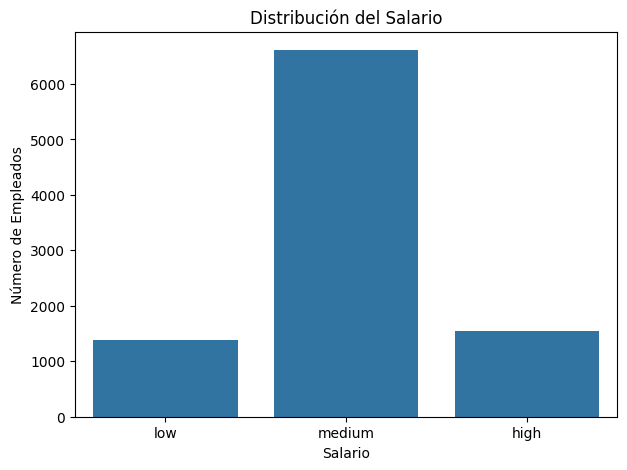

In [ ]:
# Distribución de los salarios:

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='salary', order=['low', 'medium', 'high'])

plt.title('Distribución del Salario')
plt.xlabel('Salario')
plt.ylabel('Número de Empleados')

plt.show()


Evidentemente, la mayoría de empleados, poco más del 69%, ganan un salario medio (6611/9540).

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='satisfaction')
fig.show()

Este gráfico muestra que la satisfacción tiene una distrubución prácticamente normal.

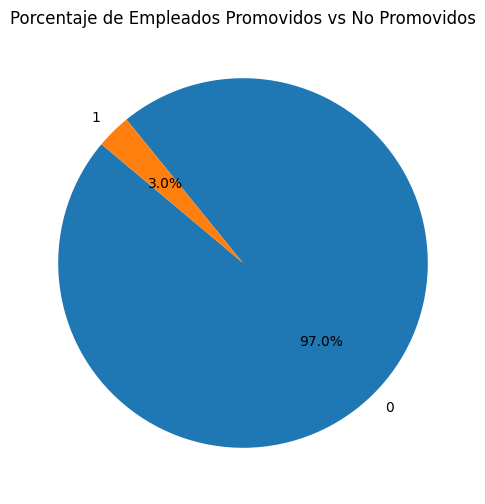

In [ ]:
# Visualización de la distribución de promociones

import matplotlib.pyplot as plt

# Contar la frecuencia de cada categoría en 'promoted'
promoted_counts = df['promoted'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(promoted_counts, labels=promoted_counts.index, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Porcentaje de Empleados Promovidos vs No Promovidos')

# Mostrar el gráfico
plt.show()

Mediante esta gráfica se evidencia que sólo el 3% de los empleados han sido promovidos. Sería importante hacer zoom en las oportunidades de crecimiento que brinda la organización.

# Análisis:


La empresa enfrenta una tasa de rotación del 30%, un indicador que requiere un análisis detallado para identificar y abordar los factores que contribuyen a esta situación. Entre los hallazgos más destacados, se observa que, sólo el 3% de los empleados han sido promovidos, un 21% han recibido un bono y la satisfacción promedio de los empleados es del 51%. Tanto las oportunidades de crecimiento como los incentivos desempeñan un papel crucial en la motivación y retención de empleados, adicionalmente, mejorar la satisfacción podría ser un aspecto estratégico que contribuya a la reducción de la tasa de rotación.
